# Data Cleaning Notebook

## Objective
The goal of this notebook is to prepare the dataset for analysis and modelling by identifying and addressing data quality issues. This includes handling missing values, correcting data types, managing duplicates, and standardising inconsistent entries.

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load the dataset
df = pd.read_csv('../Data/RAW/Fintech_user.csv')

## Data Cleaning Process

In [3]:
# Removing duplicates
df = df.drop_duplicates()
print(df.shape)

(26542, 31)


Checking which columns have missing values

In [4]:
df.isnull().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [5]:
# Checking for null values in specific columns
df[['age', 'credit_score', 'rewards_earned']].isnull().sum()


age                  4
credit_score      7789
rewards_earned    3163
dtype: int64

After checking for null values in the dataset, the following columns were found to contain missing values:
| Column           | Missing Values |
| ---------------- | -------------- |
| `age`            | 4              |
| `credit_score`   | 7,789          |
| `rewards_earned` | 3,163          |

# Handling Missing Values

Missing values in the `age` column is filled using the median. This approach was chosen because the number of missing entries is very small, and the median is a robust statistic that helps avoid distortion from potential outliers in the age distribution.

In [6]:
# Filling missing values in 'age' with the median
df['age'] = df['age'].fillna(df['age'].median())

Given the large number of missing values in `credit_score`, a two-step approach was used:
1. A new binary feature `credit_score_missing` was created to capture the fact that the value was originally missing.
2. Missing values in `credit_score` were then imputed using the median.

This strategy allows us to keep useful information about missing entries, while using the median to avoid being affected by unusually high or low values.

In [7]:
# Filling missing values in 'credit_score'
df['credit_score_missing'] = df['credit_score'].isnull().astype(int)
df['credit_score'] = df['credit_score'].fillna(df['credit_score'].median())

Missing values in `rewards_earned` were filled with 0, based on the assumption that nulls likely indicate the customer did not earn any rewards. This interpretation aligns with business logic and avoids inflating values with artificial estimates.

In [8]:
# Filling missing values in 'rewards_earned' with 0
df['rewards_earned'] = df['rewards_earned'].fillna(0)

# Handling and Standardising Missing Categorical Values

In [9]:
# Checking unique values in categorical columns to verify cleaning and ensure all categories are correctly represented
print(df['housing'].unique())
print(df['payment_type'].unique())
print(df['zodiac_sign'].unique())

['na' 'R' 'O']
['Bi-Weekly' 'Weekly' 'Semi-Monthly' 'na' 'Monthly']
['Leo' 'Capricorn' 'Aries' 'Taurus' 'Cancer' 'Sagittarius' 'Aquarius'
 'Virgo' 'Libra' 'Gemini' 'Scorpio' 'Pisces' 'na']


Converting placeholder entries ('na') to proper missing values (NaN) to ensure they are correctly handled during type conversion.

In [10]:
df['housing'] = df['housing'].replace('na', np.nan)
df['payment_type'] = df['payment_type'].replace('na', np.nan)
df['zodiac_sign'] = df['zodiac_sign'].replace('na', np.nan)


In [11]:
# Checking missing values in specific columns
missing_counts = df[['housing', 'payment_type', 'zodiac_sign']].isnull().sum()
print(missing_counts)

housing         13606
payment_type     3835
zodiac_sign      2110
dtype: int64


Missing values in the `housing`, `payment_type`, and `zodiac_sign` columns were filled with the category `"Unknown"` to retain all records and preserve categorical structure without introducing bias.

In [12]:
# Fill missing values with 'Unknown'
df['housing'] = df['housing'].fillna('Unknown')
df['payment_type'] = df['payment_type'].fillna('Unknown')
df['zodiac_sign'] = df['zodiac_sign'].fillna('Unknown')

Converting `housing`, `payment_type`, and `zodiac_sign` columns to categorical data types to improve memory efficiency and enable better handling of categorical features in future analysis.

In [13]:
df['housing'] = df['housing'].astype('category')
df['payment_type'] = df['payment_type'].astype('category')
df['zodiac_sign'] = df['zodiac_sign'].astype('category')


## Verifying data quality after cleaning

In [14]:
# Check if any missing values remain anywhere
df.isnull().sum()

user                       0
churn                      0
age                        0
housing                    0
credit_score               0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
rewards_earned             0
reward_rate                0
is_referred                0
credit_score_missing       0
dtype: int64

In [15]:
# Confirm data types are correct
df.dtypes

user                          int64
churn                         int64
age                         float64
housing                    category
credit_score                float64
deposits                      int64
withdrawal                    int64
purchases_partners            int64
purchases                     int64
cc_taken                      int64
cc_recommended                int64
cc_disliked                   int64
cc_liked                      int64
cc_application_begin          int64
app_downloaded                int64
web_user                      int64
app_web_user                  int64
ios_user                      int64
android_user                  int64
registered_phones             int64
payment_type               category
waiting_4_loan                int64
cancelled_loan                int64
received_loan                 int64
rejected_loan                 int64
zodiac_sign                category
left_for_two_month_plus       int64
left_for_one_month          

Checking outliers again after data cleaning for Credit Score and Rewards Earned.

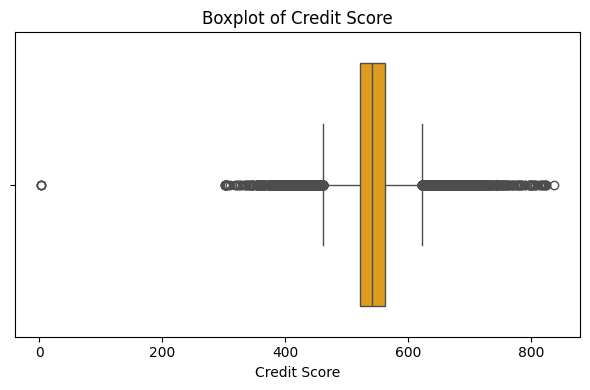

In [16]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['credit_score'], color='orange')
plt.title("Boxplot of Credit Score")
plt.xlabel("Credit Score")
plt.tight_layout()
plt.show()

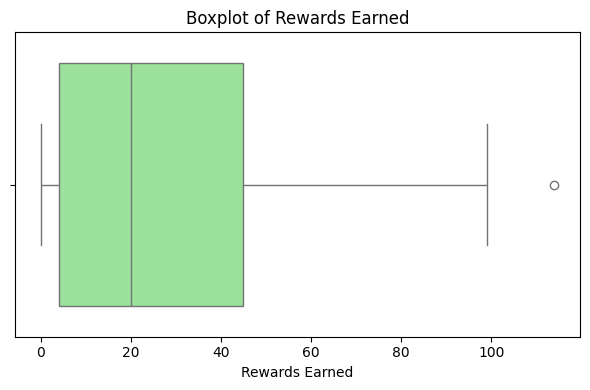

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['rewards_earned'], color='lightgreen')
plt.title("Boxplot of Rewards Earned")
plt.xlabel("Rewards Earned")
plt.tight_layout()
plt.show()

There is no change after data cleaning.

## Data Cleaning Summary

- **Duplicate Removal:** All duplicate rows were identified and removed to ensure data integrity.
- **Handling Missing Values:**  
  - The `age` column had minimal missing data and was filled with the median value to avoid the influence of outliers.  
  - The `rewards_earned` column was filled with `0` to indicate no rewards under the assumption that missing entries likely reflect a lack of activity or engagement.  
  - The `credit_score` column had substantial missing values; these were imputed with the median, and a new indicator column `credit_score_missing` was created to flag missing entries, preserving potentially useful information.  
  - Categorical columns (`housing`, `payment_type`, `zodiac_sign`) contained missing values represented as 'na'. These were replaced with `NaN` and then filled with the category `"Unknown"` to maintain category consistency without losing data.
<br><br> 
 

- **Data Type Conversion:**  
  - Relevant categorical columns were converted to the `category` data type to optimise memory usage and enable efficient processing.
<br><br>


- **Final Checks:**  
  - Confirmed that all columns have appropriate data types and no remaining null values (except where intentionally preserved for missingness indicators).
<br><br>


- **Next Steps:**  
  - The cleaned dataset has been saved for further analysis and modelling. 



In [17]:
# Save as CSV (common format)
df.to_csv('cleaned_data.csv', index=False)
